In [105]:
import rasterio
import rasterio.plot
from rasterio.crs import CRS
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

# example


In [69]:
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-2 * np.log(2) * ((X + 1) ** 2 + (Y) ** 2) / 1**2)
Z2 = np.exp(-2 * np.log(2) * ((X - 1) ** 2 + (Y) ** 2) / 1**2)

Z = (90 * Z2 + 5 * Z1) / (Z2 + Z1)
Zn = [Z1, Z2]
Z = np.sum([a*b for a,b in zip(Zn, [5, 90])], axis=0) / np.sum(Zn, axis=0)

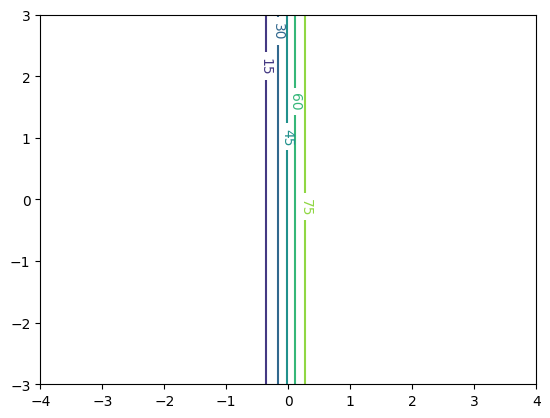

In [70]:
p = plt.contour(X, Y, Z)
plt.clabel(p, inline=1, fontsize=10)
plt.show()

In [5]:
# from rasterio.transform import Affine

# res = (x[-1] - x[0]) / 240.0
# transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)
# transform

dkm


In [6]:
with rasterio.open(
    "new.tif",
    "w",
    driver="GTiff",
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
) as dst:
    dst.write(Z, 1)

/home/till/projects/map/env/lib/python3.10/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


/home/till/projects/map/env/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


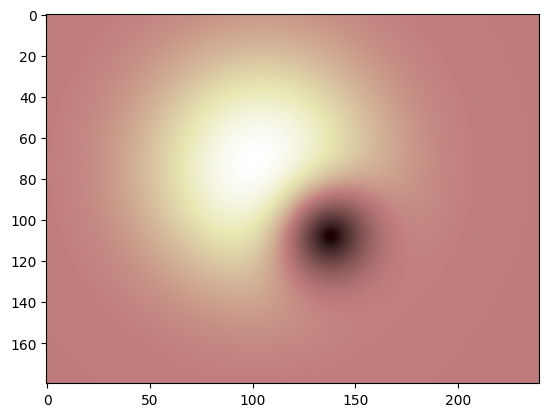

In [7]:
src = rasterio.open("new.tif")
plt.imshow(src.read(1), cmap='pink')
plt.show()

# real


In [8]:
points = gpd.read_file('../waiting_time_per_point.csv')
points.wait = points.wait.astype(float)
points.lat = points.lat.astype(float)
points.lon = points.lon.astype(float)
points = points[points['wait'] <= 100]

In [9]:
germany = [5.0, 48.0, 15.0, 55.0]
europe = [-12.0, 35.0, 45.0, 71.0]
world = [-180.0, -90.0, 180.0, 90.0]
map = germany

In [10]:
points = points[points["lat"] > map[1]]
points = points[points["lat"] < map[3]]
points = points[points["lon"] > map[0]]
points = points[points["lon"] < map[2]]

In [77]:
x = np.linspace(map[0], map[2], int(map[2] - map[0]) * 10)
y = np.linspace(map[1],map[3], int(map[3] - map[1]) * 10)
X, Y = np.meshgrid(x, y)


def get_dist(lat, lon):
    return np.exp(-2 *np.log(2) * ((X - lon) ** 2 + (Y - lat) ** 2) / 1**2)


Zn = [
    get_dist(lat, lon)
    for lat, lon in zip(points.lat, points.lon)
]
Z = np.sum([a*b for a,b in zip(Zn, points.wait)], axis=0) / np.sum(Zn, axis=0)

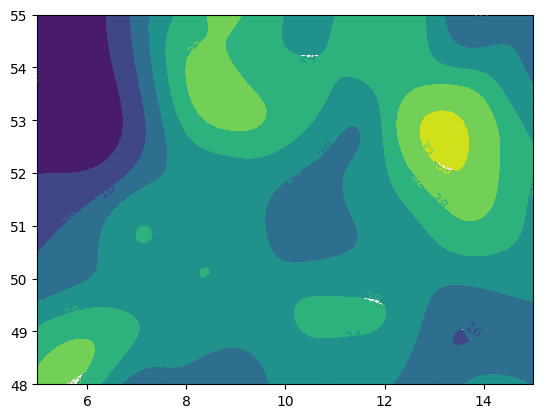

In [91]:
p = plt.contourf(X, Y, Z)
plt.clabel(p, inline=1, fontsize=10)
plt.show()

In [111]:
with rasterio.open(
    "map.tif",
    "w",
    driver="GTiff",
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    crs=CRS.from_epsg(4326),
    dtype=Z.dtype,
) as dst:
    dst.write(Z, 1)

<Axes: >

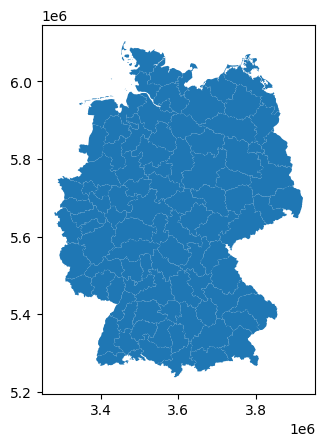

In [101]:
countries.plot()

/home/till/projects/map/env/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


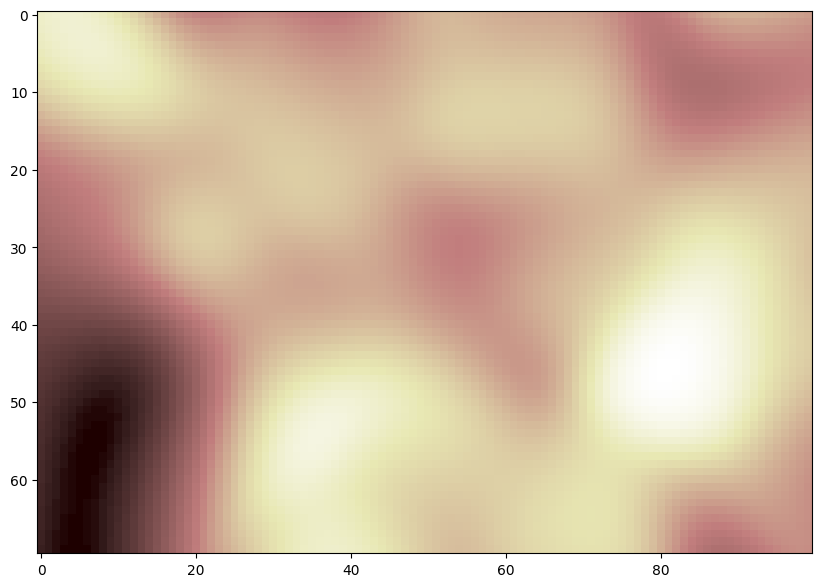

/tmp/ipykernel_8023/2538347012.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/home/till/projects/map/env/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


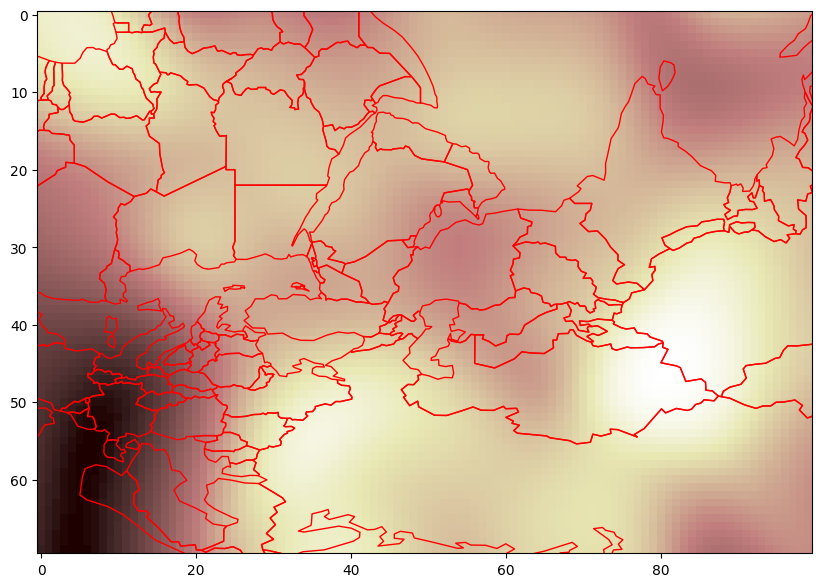

In [98]:
countries = gpd.read_file("ROR5000.shp")
src = rasterio.open("german.tif")

fig, ax = plt.subplots(figsize=(10, 10))
rasterio.plot.show(src, ax=ax)
countries.plot(ax=ax, facecolor='none', edgecolor='red')
plt.imshow(src.read(1), cmap='pink')
plt.show()

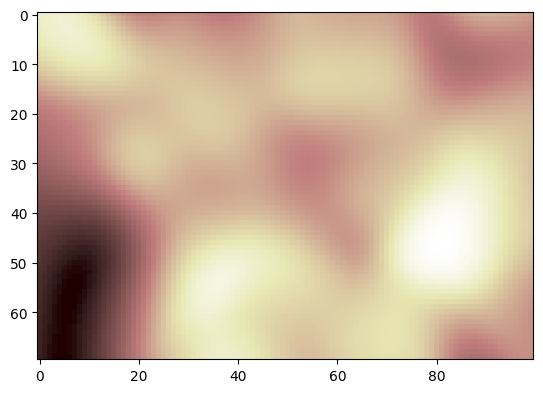

In [112]:
src = rasterio.open("map.tif")
plt.imshow(src.read(1), cmap='pink')
plt.show()

Warning 1: TIFFFetchNormalTag:Incorrect value for "RichTIFFIPTC"; tag ignored


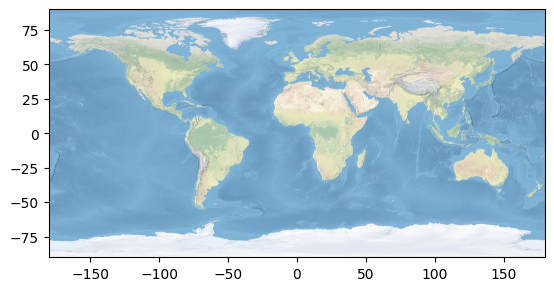

<Axes: >

In [116]:
raster = rasterio.open("world.tif")
rasterio.plot.show(raster)

# world


In [ ]:
points = gpd.read_file('../waiting_time_per_point.csv')
points.wait = points.wait.astype(float)
points.lat = points.lat.astype(float)
points.lon = points.lon.astype(float)

NameError: name 'gpd' is not defined

In [ ]:
points = points[points['wait'] <= 100]

In [ ]:
x = np.linspace(-180.0, 180.0, 3600)
y = np.linspace(-90.0, 90.0, 1800)
X, Y = np.meshgrid(x, y)


def get_dist(lat, lon, time):
    return time * np.exp(-2 * np.log(2) * ((X - lon) ** 2 + (Y - lat) ** 2) / 1**2)


Zn = [
    get_dist(lat, lon, time)
    for lat, lon, time in zip(points.lat, points.lon, points.wait)
]
Z = np.sum(Zn, axis=0) / sum(points.wait)

: 

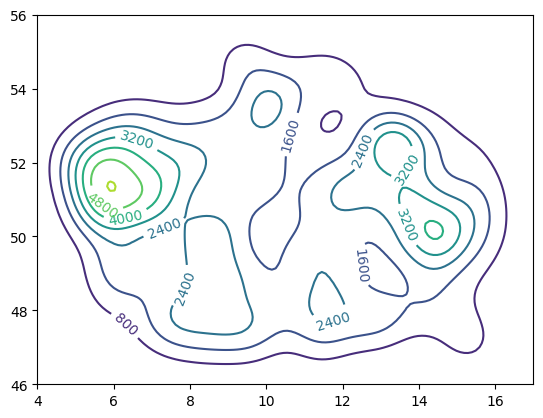

In [ ]:
p = plt.contour(X, Y, Z)
plt.clabel(p, inline=1, fontsize=10)
plt.show()

In [ ]:
with rasterio.open(
    "german.tif",
    "w",
    driver="GTiff",
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
) as dst:
    dst.write(Z, 1)

/home/till/projects/map/env/lib/python3.10/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


/home/till/projects/map/env/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


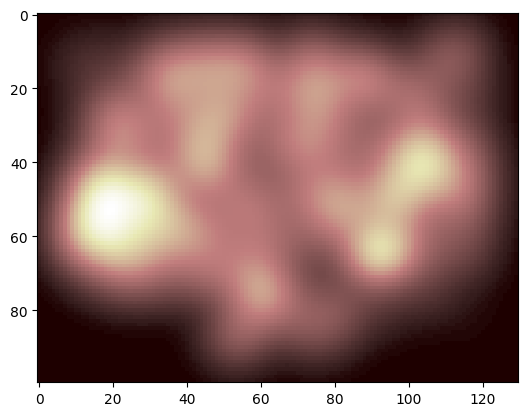

In [ ]:
src = rasterio.open("german.tif")
plt.imshow(src.read(1), cmap='pink')
plt.show()